##  Q_28)  해시맵 디자인

다음의 기능을 제공하는 해시맵을 디자인해라.

- put(key, value): 키, 값을 해시맵에 삽입한다. 만약 이미 존재하는 키라면 업데이트한다.

- get(key): 키에 해당하는 값을 조회한다. 만약 키가 존재하지 않는다면, -1를 리턴한다.

- remove(key): 키에 해당하는 키, 값을 해시맵에서 삭제한다.

In [ ]:
class MyHashMap:
    # 초기화
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.size = 1000 # 기본사이즈로 자의적으로 설정
        self.table = collections.defaultdict(ListNode)
        # defaultdict는 존재하지 않는 인덱스로 시도할 경우, error로 발생하지 않음
        # 대신 디폴트값을 출력하는데 여기에서는 빈 노드
        
    # 삽입
    def put(self, key: int, value: int) -> None:
        """
        value will always be non-negative.
        """
        index = key % self.size
        # 인덱스에 노드가 없다면 삽입 후 종료
        if self.table[index].value is None: 
            self.table[index] = ListNode(key, value)
            return
        
        # 인덱스에 노드가 존재하는 경우 연결 리스트 처리
        p = self.table[index]
        while p :
            # 키가 존재할 경우 값을 업데이트하고 종료
            if p.key == key:
                p.value = value
                return
            # p.next가 존재하지 않을 때, 루프를 빠져나옴
            if p.next is None:
                break
            p = p.next
        # p.next에 값(원래 None) 할당
        p.next = ListNode(key, value)
        
    # 조회
    def get(self, key: int) -> int:
        """
        Returns the value to which the specified key is mapped, or -1 if this map contains no mapping for the key
        """
        index = key % self.size
        if self.table[index].value is None:
            return -1
        # 노드가 존재할 때 일어나는 키 탐색
        p = self.table[index]
        while p:
            if p.key == key:
                return p.value
            p = p.next
        return -1
    # 삭제
    def remove(self, key: int) -> None:
        """
        Removes the mapping of the specified value key if this map contains a mapping for the key
        """
        index = key % self.size
        if self.table[index].value is None:
            return 
        
        # 인덱스의 첫 번째 노드일 때 삭제 처리
        p = self.table[index]
        if p.key == key:
            self.table[index] = ListNode if p.next is None else p.next
            return 
        
        # 첫 번째 노드가 아닐 때 연결 리스트 노드 삭제
        prev = p 
        while p:
            if p.key == key:
                prev.next = p.next
                return 
            prev,p = p,p.next


# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)

## Q_29) 보석과 돌

### 29_1 내풀이

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        return(len([s for s in stones if s in jewels]))

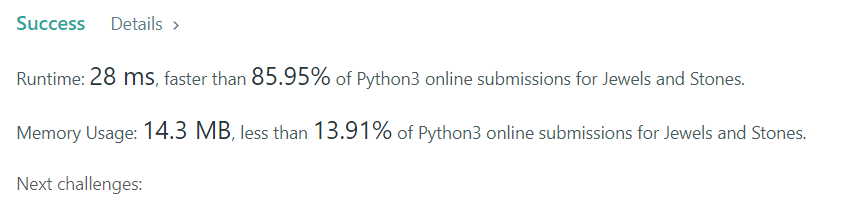

### 29_1해시테이블을 이용한 풀이

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        freqs = {}
        count = 0
        
        # 돌(S)의 빈도 수 계산
        for char in stones:
            if char not in freqs:
                freqs[char] = 1
            else:
                freqs[char] += 1
        
        # 보석(J)의 빈도 수 합산
        for char in jewels:
            if char in freqs:
                count += freqs[char]
                
        return count

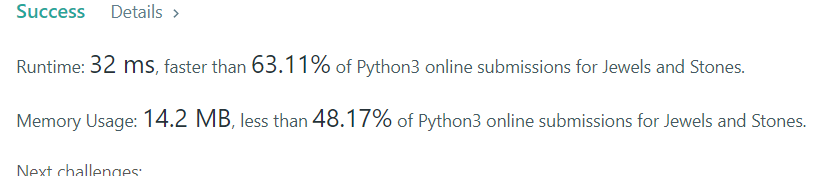

### 29_2 defaultdict르 이용한 비교 생략

defaultdict는 존재하지 않는 키에 디폴트 값을 출력(error가 아닌)

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        freq = collections.defaultdict(int)
        count = 0
        
        # 비교없이 돌(S) 빈도 수 계산
        for char in stones:
            freq[char] += 1
        
        # 비교 없이 보석(J) 빈도 수 계산
        for char in jewels:
            count += freq[char]
        
        return count

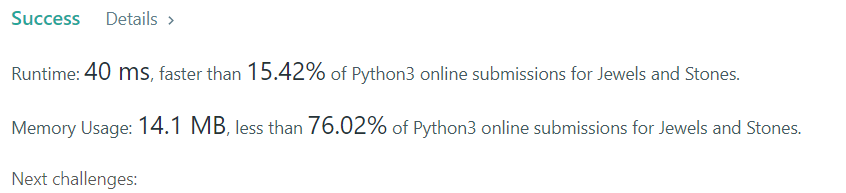

### 29_3 Counter로 계산 생략

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        freq = collections.Counter(stones) # 돌(S) 빈도 수 계산
        count = 0
        # 비교없이  보석(J) 빈도 수 합산
        for char in jewels:
            count += freq[char]
        
        return count

# Counter는 존재하지 않은 키의 경우 KeyError가 아니라, 0을 출력하기 때문에
# defaultdict와 마찬가지로 에러에 대한 예외 처리를 할 피료가 없다.

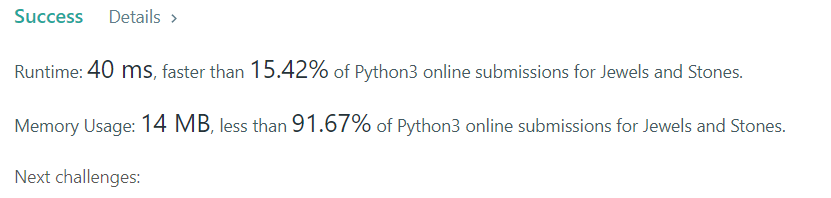

### 29_4 파이썬다운 방식

In [ ]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        return(sum(s in jewels for s in stones))

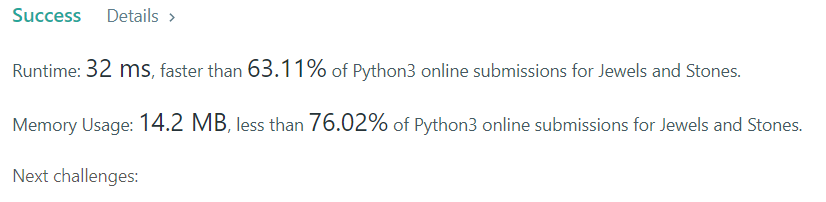

## Q_30) 중복 문자 없는 가장 긴 부분 문자열

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        used = {}
        max_length = start = 0
        for idx, char in enumerate(s):
            # 이미 등작했던 문자라면 'start' 위치 갱신
            if char in used and start <= used[char]: # 등장했더라도 윈도우 사이즈 벗어나는걸 방지 
                start = used[char] +1
            
            else: # 최대 부분 문자열 길이 갱신
                max_length = max(max_length, idx-start+1)
            
            # 현재 문자의 위치 삽입
            used[char] = idx
        
        return max_length

## Q_31) 상위 K 빈도 요소

### 31_1 내 풀이

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        return [s[0] for s in collections.Counter(nums).most_common(k)]

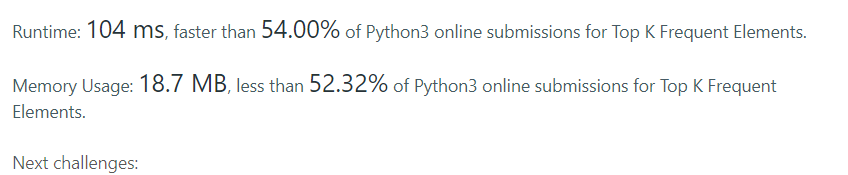

### 31_2 Counter를 이용한 음수 순 추출

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        freqs = collections.Counter(nums)
        freqs_heap = []
        # 힙에 음수로 삽입(heapq는 Minheap만 지원하기에)
        for f in freqs:
            heapq.heappush(freqs_heap, (-freqs[f],f))
        
        topk = list()
        # k번 만큼 추출, 최소 힙(Min_Heap)이므로 가장 작은 음수 순으로 추출
        for _ in range(k):
            topk.append(heapq.heappop(freqs_heap)[1])
        
        return topk

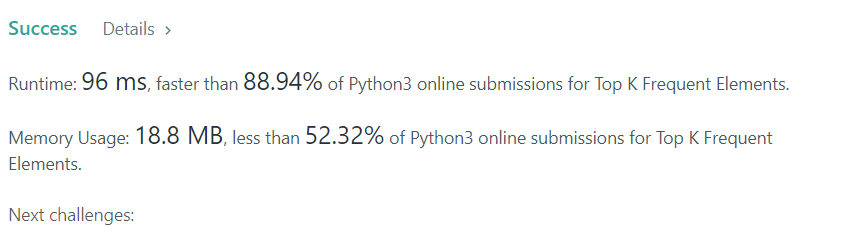

### 31_3 파이썬다운 방식

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        return list(zip(*collections.Counter(nums).most_common(k)))[0]

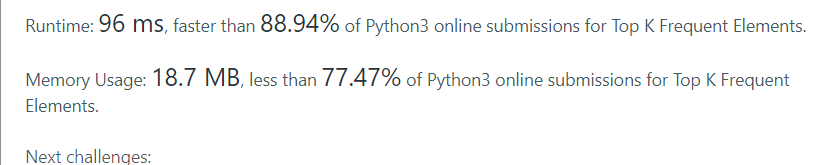

In [ ]:
import collections
nums = [1,1,1,2,2,3]
print(list(zip(collections.Counter(nums).most_common(2))))
print(list(zip(*collections.Counter(nums).most_common(2))))

# *를 활용한 Unpacking을 진행하지 않는다면, 튜플이 풀어지지 않고 그대로 하나의 값처럼 묶임
# * 한개는 튜플 또는 리스트 등의 시퀀스 언패킹
# **는 키/값 페어를 언패킹

[((1, 3),), ((2, 2),)]
[(1, 2), (3, 2)]
